In [21]:
from sympy import *
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()




# Geometrical constants, pressure drop and prescribed velocity

In [22]:
# Geometrical constants, prescribed pressure drop and prescribed velocity
relativeEccentrcity=0.5
R2_=7.6
R1_=5
shift=(R2_-R1_)*relativeEccentrcity
u_R_=0.4
dp_=10
l_=1.55
mu_=10.11




In [23]:
R1, R2,delta, xi, eta, x,y,b, A, B, C, epsilon, kappa, alpha, beta, c, M, F, Psi, u_R, mu, l, dp =symbols('R1 R2 delta xi eta x y b A B C epsilon kappa alpha beta c M F Psi u_R mu l dp', real=True)
k, m, n = symbols('k m n', integer=True)




# The velocity

In [24]:
u=(dp/(mu*l))*M**2*(Psi+A*eta+B-(cosh(eta)-cos(xi))/(4*(cosh(eta)+cos(xi))))+(u_R/(beta-alpha))*(eta-alpha)


u

M**2*dp*(A*eta + B + Psi - (-cos(xi) + cosh(eta))/(4*cos(xi) + 4*cosh(eta)))/(l*mu) + u_R*(-alpha + eta)/(-alpha + beta)

In [25]:
testA=(coth(alpha)-coth(beta))/(2*(alpha-beta))
testA



(coth(alpha) - coth(beta))/(2*alpha - 2*beta)

In [26]:
testB=(beta*(1-2*coth(alpha))-alpha*(1-2*coth(beta)))/(4*(alpha-beta))
testB



(-alpha*(1 - 2*coth(beta)) + beta*(1 - 2*coth(alpha)))/(4*alpha - 4*beta)

In [27]:
testF=(R2**2-R1**2+b**2)/(2*b)
testF



(-R1**2 + R2**2 + b**2)/(2*b)

In [28]:
testM=sqrt(F**2-R2**2)
testM



sqrt(F**2 - R2**2)

In [29]:
testAlpha=0.5*log((F+M)/(F-M))
testAlpha



0.5*log((F + M)/(F - M))

In [30]:
testBeta=0.5*log((F-b+M)/(F-b-M))
testB



(-alpha*(1 - 2*coth(beta)) + beta*(1 - 2*coth(alpha)))/(4*alpha - 4*beta)

In [31]:
testPsi=Sum((-1)**n*(cos(n*xi)/(sinh(n*(beta-alpha))))*(exp(-n*beta)*coth(beta)*sinh(n*(eta-alpha))-exp(-n*alpha)*coth(alpha)*sinh(n*(eta-beta))), (n, 1, m))
testPsi



Sum((-1)**n*(exp(-beta*n)*sinh(n*(-alpha + eta))*coth(beta) - exp(-alpha*n)*sinh(n*(-beta + eta))*coth(alpha))*cos(n*xi)/sinh(n*(-alpha + beta)), (n, 1, m))

# Velocity in w-plane rectangle in $\xi$ and $\eta$

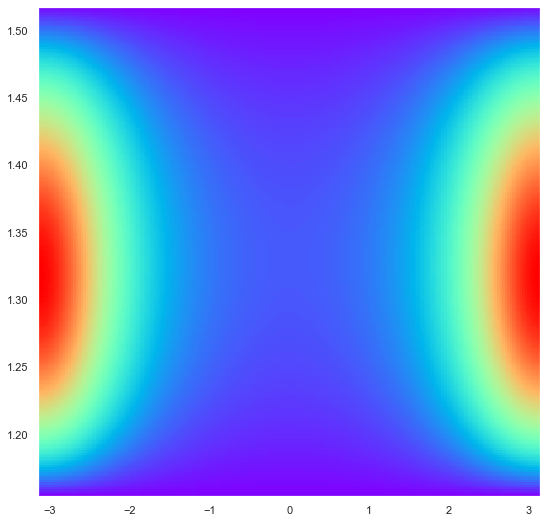

In [32]:
yShift1=float((testM*coth(testAlpha.subs(M,testM))).subs(F,testF).subs(R2,R2_).subs(R1,R1_).subs(b,abs(shift)))
yShift2=yShift1-abs(shift)


# ### The actual conformal mapping itself

testEta=log((M**2 + 2*M*(y+delta) + x**2 + (y+delta)**2)/(M**2 - 2*M*(y+delta) + x**2 + (y+delta)**2))/2

testXi=-atan2(2*M*x,(M**2 - x**2 - (y+delta)**2))


alphaNum=float(testAlpha.subs(M,testM).subs(F,testF).subs(R2,R2_).subs(R1,R1_).subs(b,abs(shift)))
betaNum=float(testBeta.subs(M,testM).subs(F,testF).subs(R2,R2_).subs(R1,R1_).subs(b,abs(shift)))


cNum=float(testM.subs(F,testF).subs(R2,R2_).subs(R1,R1_).subs(b,abs(shift)))



velW=u.subs(A,testA).subs(B,testB).subs(Psi,testPsi)
velW=velW.subs(alpha,testAlpha).subs(beta,testBeta).subs(M,testM).subs(F,testF)
velW=velW.subs(R2,R2_).subs(R1,R1_).subs(b,abs(shift)).subs(delta,yShift1).subs(u_R,u_R_).subs(mu, mu_).subs(l,l_).subs(dp, 10**5*dp_)


uwNum=lambdify((xi,eta),velW.subs(m,100))

# Geometry creation and plotting
Xi = np.linspace(-np.pi, np.pi,200)
Eta = np.linspace(alphaNum,betaNum,200)
Xi, Eta = np.meshgrid(Xi, Eta)
fig, ax = plt.subplots(figsize=(9,9))
plt.pcolor(Xi,Eta, uwNum(Xi,Eta), cmap='rainbow')



# Velocity in z-plane eccentric annulus in $x$ and $y$

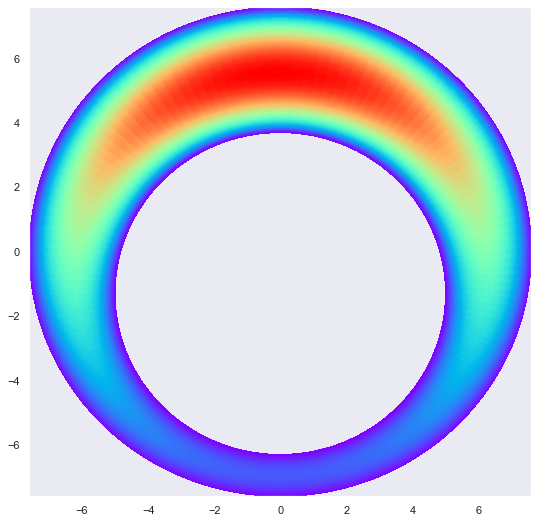

In [33]:
velZ=u.subs(A,testA).subs(B,testB).subs(Psi,testPsi).subs(eta,testEta).subs(xi,testXi)
velZ=velZ.subs(alpha,testAlpha).subs(beta,testBeta).subs(M,testM).subs(F,testF)
velZ=velZ.subs(R2,R2_).subs(R1,R1_).subs(b,abs(shift)).subs(delta,yShift1).subs(u_R,u_R_).subs(mu, mu_).subs(l,l_).subs(dp, 10**5*dp_)


uzNum=lambdify((x,y),velZ.subs(m,100))

# Geometry creation and plotting
X = np.linspace(-np.pi, np.pi,200)
Y = np.linspace(alphaNum,betaNum,200)
X, Y = np.meshgrid(X, Y)
zeta = X + 1j*Y
x_y = cNum*np.tan(zeta/2)
X = np.real(x_y)
Y = np.imag(x_y)-yShift1
fig, ax = plt.subplots(figsize=(9,9))
plt.pcolor(X,Y, uzNum(X,Y), cmap='rainbow')